# Celebrity Image Classifier (Part 2 - Model Building)

In [1]:
#Importing neccessary modules
import os,cv2
import pywt,PIL
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras 
from keras import layers,models
sns.set_theme()

In [7]:
os.getcwd()

'/Users/paramkesarwani/DataScience/tensorflow/DataScienceModel'

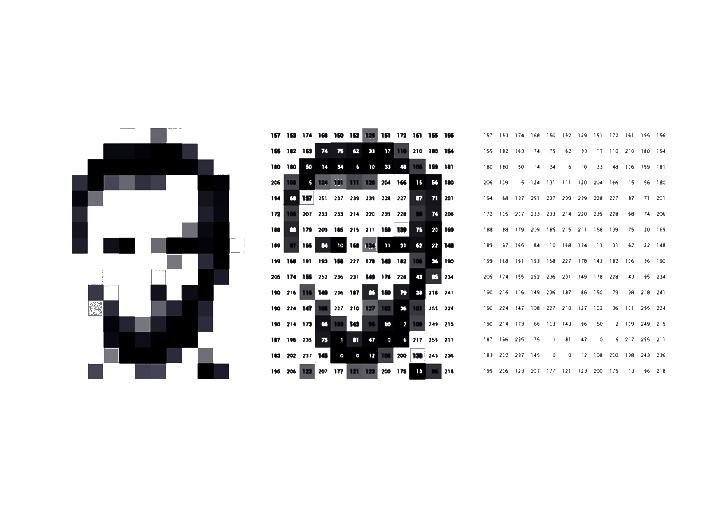

In [8]:
# To show that a image actually a matrix
PIL.Image.open('./matrix.png')

In [9]:
# X will store the image matrix and y the image target ie the image belong to which celebrity
X,y = [],[]

In [10]:
celebs=['elonmusk','kohli','ronaldo','dhoni','pichae']

In [11]:
celeb_dict ={}
count=0
for name in celebs:
    celeb_dict[name] = count
    count+=1
celeb_dict
# y variable will store 0 for elonmusk image , 1 for Virat kohli image as so on..

{'elonmusk': 0, 'kohli': 1, 'ronaldo': 2, 'dhoni': 3, 'pichae': 4}

In [12]:
link = './datasets/cropped/'
link

'./datasets/cropped/'

In [13]:
# celeb_dict_pics={
X,y = [],[]
for name in celebs:
#     celeb_dict_pics[name]=[]
    dir = os.path.join(link,name)
    for i in os.listdir(dir):
        if i.startswith('.'):
            continue
        img = cv2.imread(dir+'/'+i)
        
        image = cv2.resize(img, (500,500), interpolation = cv2.INTER_AREA)
        if image is None:
            continue
        X.append(image)
        y.append(celeb_dict[name])
#         print(os.path.join(link,'cropped_'+name))

In [14]:
len(X)

346

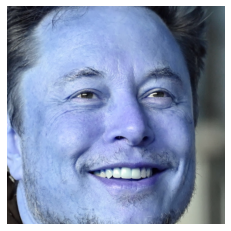

In [209]:
plt.axis('off')
plt.imshow(X[0])

In [210]:
celebs[y[0]]

'elonmusk'

In [211]:
def ValuesCOunts(y):
    A = pd.Series(y).value_counts().index
    B = pd.Series(y).value_counts()
    A = [celebs[i].upper() for i in A]

    df = pd.DataFrame([A,B]).T
    return df
    

In [212]:
# the values shows the number of data for each celebrity
df = ValuesCOunts(y)
df

,0,1
0,RONALDO,80
1,KOHLI,76
2,DHONI,71
3,ELONMUSK,60
4,PICHAE,59


# # Model Creation begins

In [213]:
# Splitting the X into training as test data
"""Traing data is the one that will be fed to Model for training that ie updates weights , and test data is the one
    on which the model will be evaluated. This score will give a rough idea of how our model will perform on a 
    unseen data
    For splitting the data i used sklearn test train split , which will split the X into 80% training and 20% test data
    , before spliting it will shuffle the data and spliting would be stratified sampling that will ensure all the target 
    should be their in test and training data in a reasonable amount
    """
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,stratify=y,random_state=60,test_size=.2)



In [214]:
## We will use CNN(Convolutional Neural Network) for model creation . CNN takes input the tensors(numpy array)
X_train_array = np.array(X_train) # Converting X_train to numpy array
X_test_array = np.array(X_test)  # Converting X_test to numpy array
y_test = np.array(y_test)
y_train =np.array(y_train)

In [215]:
"""CNN uses back propogation algorithm where weigth updation is performed by Gradient Descent , for GD to converge 
fastly to minimum the input values must be scaled 
Since the numpy arrray contains value between 0-255 , 
thus to scale it to values between 0-1 we divide numpy array by 255"""
X_train_scaled =X_train_array/255
X_test_scaled = X_test_array/255

In [216]:
X_train_scaled.shape

(276, 500, 500, 3)

In [262]:
X_test_scaled.shape

(70, 500, 500, 3)

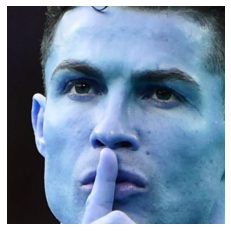

In [264]:
plt.axis('off')
plt.imshow(X_test_scaled[5])

In [231]:
celebs[y_test[5]]

'ronaldo'

In [218]:
# Distribution of training data
ValuesCOunts(y_train)

,0,1
0,RONALDO,64
1,KOHLI,60
2,DHONI,57
3,ELONMUSK,48
4,PICHAE,47


In [219]:
# Distribution of test data
ValuesCOunts(y_test)

,0,1
0,KOHLI,16
1,RONALDO,16
2,DHONI,14
3,PICHAE,12
4,ELONMUSK,12


In [220]:
""" MODEL CREATION ==> The Convolution Neural Network Deep Learing Model
    CNN consist of 3 cnn layers and 2 dense layers
    First layers takes as input a (500,500,3) tensor and will create a feature map of (498,498,32) as (498 = 500-3+1)
    as the strides are of 3*3
    Then the max pooling operation reduces the feature map to half i.e (249,249,32)
    Similarly 2nd layer =>(247,247,64) =>(123,123,64)
    Similarly 3rd layer =>(121,121,128) =>(60,60,64)
    Similarly 3rd layer =>(58,58,32) =>(29,29,64)
    
    
    layers.Flatten() will flatten the feature map i.e shape to 29*29*32 = 26912
    layers.Dense will reduce flatten array to 512 then 5(required no of classes)
    
"""
model = models.Sequential([
    layers.Conv2D(32,3,activation='relu',input_shape=((500,500,3))),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(5,activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [221]:
# Model Training on training data
"""Epochs is the number of times the training will be done or data will be passed to model,
On the first epoch model initialize weight values randomly then the passed data give a accuracy , it will be used in
back propogation alogorithm to update the weight values , same will be did on each successive eopchs
The loss that is how far our prediction is from actual target used is "sparse_categorical_crossentropy"
The algorithm that will update the weight values is "Adam"
And we will use Acuracy metrics to evaluate our models predictions"""

history = model.fit(X_train_scaled,y_train,epochs=8)

Epoch 1/8


2022-05-18 11:15:23.820253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 18s 2s/step - loss: 1.8396 - accuracy: 0.1920
Epoch 2/8
9/9 [==============================] - 14s 2s/step - loss: 1.5553 - accuracy: 0.2899
Epoch 3/8
9/9 [==============================] - 13s 1s/step - loss: 1.2061 - accuracy: 0.5580
Epoch 4/8
9/9 [==============================] - 13s 2s/step - loss: 0.7151 - accuracy: 0.7500
Epoch 5/8
9/9 [==============================] - 13s 2s/step - loss: 0.5260 - accuracy: 0.8225
Epoch 6/8
9/9 [==============================] - 13s 2s/step - loss: 0.2668 - accuracy: 0.8986
Epoch 7/8
9/9 [==============================] - 14s 1s/step - loss: 0.1548 - accuracy: 0.9420
Epoch 8/8
9/9 [==============================] - 10s 1s/step - loss: 0.0622 - accuracy: 0.9746


In [265]:
# Evaluation the model on test dataset, it make 85% acurate predictions on an unseen data
model.evaluate(X_test_scaled,y_test)

3/3 [==============================] - 1s 269ms/step - loss: 0.5328 - accuracy: 0.8571


[0.5328382253646851, 0.8571428656578064]

In [266]:
# Its give a small summary of model architecture 
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 249, 249, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 247, 247, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 123, 123, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 121, 121, 64)      36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 60, 60, 64)      

In [268]:
# Storing the models predictions
pred = model.predict(X_test_scaled)

In [269]:
# The pred[0] is the model prediction probability ie with what probability model says this image belongs 
# to corresponding class label
pred[0]

array([1.07489434e-07, 1.98050112e-01, 1.97160216e-06, 2.05045231e-04,
       8.01742792e-01], dtype=float32)

In [270]:
pred = [np.argmax(i) for i in pred]
pd.Series(pred).value_counts()

4    15
2    15
1    14
0    14
3    12
dtype: int64

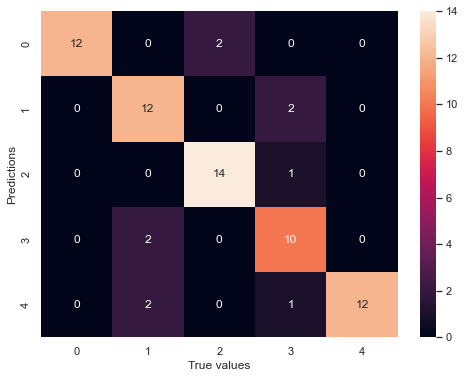

In [274]:
"""
Confusion matrix is a data analytical graph. On the y axis it show the what model predict and on the x-axis it shows
what were the true labels 
for eg in (O of y axis) Our model predicted class 0 as 0 , 12 times and class 2 as 0 , 2 times in short =>
out of total predcitions of class 0 , 12 were actually 0 and 2 times it wrongly predicted class 2 as class 0
Our Model correctly classified (12+12+14+10+12) times out of (12+16+16+14+12)
Thus accuracy is 60/70 = 0.8751
"""
from sklearn.metrics import classification_report,confusion_matrix
plt.figure(figsize=(8,6))
ax = sns.heatmap(confusion_matrix(pred,y_test),annot=True)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()

In [275]:
""" Our model prediction classification report card
Precision is how many truth data is correctly classified by model.
Eg for class 0 no of true labels were 12 and model predicted all the 12 times correctly thus value is 12/12 = 1

Recall is out of total prediction how many of them were correctly classified
Eg for class 0 no of times model predited 0 is 14 and it actually belons to clas 0 12 times  thus value is 12/14 = .8571 ~ .86

f1 score is harmonic mean of recall and precision value i.e 2*P*R(P+R)
Eg class 0 => 2*1*86/(1+.86) = .92

Support of count of label 0 in test set

"""
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.75      0.86      0.80        14
           2       0.88      0.93      0.90        15
           3       0.71      0.83      0.77        12
           4       1.00      0.80      0.89        15

    accuracy                           0.86        70
   macro avg       0.87      0.86      0.86        70
weighted avg       0.87      0.86      0.86        70



In [60]:
# Saving the model to local system as it will be used by python flask server
import joblib
joblib.dump(model,'saved_model.pkl')

INFO:tensorflow:Assets written to: ram://31eb7931-ebf5-4ec9-a0fb-0f7f023e60ad/assets


['saved_model.pkl']

In [261]:
# Also saving the celebrity dictionary to label the model prediction to its Celebrity name
import json
with open('data2.json','w') as outfile:
    json.dump(celeb_dict,outfile)